# Midterm Project
### House price prediction
#### Aisagaliyev S., Abdireshov Zh., Abdiyev A.

In [1]:
# Importing necessary libraries and reading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('house.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Dataframe information

In [2]:
df.shape

(13320, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
# Information of total value count in different column
for column in df.columns:
    print(df[column].value_counts().head())

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
Name: availability, dtype: int64
Whitefield         540
Sarjapur  Road     399
Electronic City    302
Kanakpura Road     273
Thanisandra        234
Name: location, dtype: int64
2 BHK        5199
3 BHK        4310
4 Bedroom     826
4 BHK         591
3 Bedroom     547
Name: size, dtype: int64
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
Name: society, dtype: int64
1200    843
1100    221
1500    205
2400    196
600     180
Name: total_sqft, dtype: int64
2.0    6908
3.0    3286
4.0    1226
1.0     788
5.0     524
Name: bath, dtype: int64
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64
75.0    310
65.0    302
55.0    275
60.0    270
45.0    240
Name: price, dtype: int64


In [5]:
# Getting the info of null values in the dataset
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## Data preparation

In [6]:
# Dropping the column which will not create any significant impact on our performance
df.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [7]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


#### Null Value Handling

In [9]:
# Counting values in location column
df['location'].value_counts()

Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Tippenahalli                 1
Rajagopala Nagar             1
Nagarbhavi  BDA Complex      1
EPIP AREA, WHITEFIELD        1
Amco Colony                  1
Name: location, Length: 1305, dtype: int64

In [10]:
# As WhiteFeild have max occurance so we will fill all the Null values in location column by Whitefeild
df['location']=df['location'].fillna('Whitefeild')

In [11]:
# Checking the values in 'size' column
df['size'].value_counts().head()

2 BHK        5199
3 BHK        4310
4 Bedroom     826
4 BHK         591
3 Bedroom     547
Name: size, dtype: int64

In [12]:
# As maximum house is 2Bhk so fill the nan value by 2BHK
df['size']=df['size'].fillna('2 BHK')

In [13]:
# Filling the bath NaN value with median of that column
df['bath']=df['bath'].fillna(df['bath'].median())

In [14]:
# Everything is clear now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


#### Data preprocessing

In [15]:
# Spliting the BHK column as only numerical part will help in the prediction BHK is same and categorical
# so we need to remove the BHK part
df['bhk']=df['size'].str.split().str.get(0).astype(int)

In [16]:
df[df.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
# We can see that some of the area value have ranges so we need to solve this problem
# so we will take the average of the higher and lower value and fill that into the column
def Rangeconverter(x):
    
    temp= x.split('-')
    if len(temp)==2:
        return (float(temp[0])+ float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
df['total_sqft']= df['total_sqft'].apply(Rangeconverter)

In [20]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
# Getting the value of price per square foot
df['price_per_sqft']= df['price']*100000/ df['total_sqft']

In [22]:
df['price_per_sqft'].head()

0    3699.810606
1    4615.384615
2    4305.555556
3    6245.890861
4    4250.000000
Name: price_per_sqft, dtype: float64

In [23]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [24]:
df['location'].value_counts().unique()

array([540, 399, 302, 273, 234, 213, 186, 177, 175, 171, 152, 149, 142,
       132, 107, 100,  96,  91,  88,  85,  84,  82,  80,  79,  75,  74,
        73,  72,  71,  70,  66,  64,  63,  62,  60,  58,  57,  56,  55,
        54,  53,  52,  51,  50,  49,  48,  47,  45,  44,  43,  42,  41,
        40,  39,  38,  37,  36,  35,  34,  33,  31,  30,  29,  28,  27,
        26,  25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,
        13,  12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
      dtype=int64)

In [25]:
df['location']= df['location'].apply(lambda x: x.strip())
location_count= df['location'].value_counts()

In [26]:
# Getting the info of that location which is coming less than 10 times in the data
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

Basapura                   10
Nagappa Reddy Layout       10
BTM 1st Stage              10
1st Block Koramangala      10
Gunjur Palya               10
                           ..
Kenchanehalli R R Nagar     1
D Souza Layout              1
MEI layout, Bagalgunte      1
Pillanna Gardens            1
Amco Colony                 1
Name: location, Length: 1054, dtype: int64

In [27]:
# If any location is coming less than 10 times so rename it
# as others bcoz otherwise at the time of encoding it will create alot of variable
df['location']= df['location'].apply(lambda x : 'other' if x in location_count_less_10 else x)

In [28]:
df['location'].value_counts()

other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Marsur                  11
Kodigehalli             11
Pattandur Agrahara      11
LB Shastri Nagar        11
Tindlu                  11
Name: location, Length: 242, dtype: int64

In [29]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [30]:
# Getting the info of aveage area with respect to BHK
(df['total_sqft']/df['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [31]:
# Getting all the rows which have more than 300 total_sqft/BHK
df= df[((df['total_sqft']/df['bhk'])>=300)]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [32]:
df.shape

(12530, 7)

In [33]:
df.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Handling outlier values

In [34]:
# Numerical columns
df_num = df[['bath','price']]

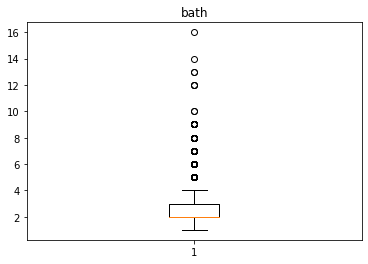

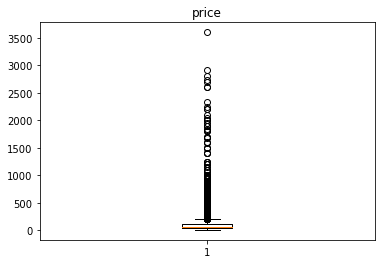

In [35]:
# Checking the outliers
for i in df_num.columns:
    plt.boxplot(df_num[i])
    plt.title(i)
    plt.show()

In [36]:
# For removing the outliers we used IQR method

q_low = df["total_sqft"].quantile(0.1) 
q_hi  = df["total_sqft"].quantile(0.9) 
 
df_filtered = df[(df["total_sqft"] < q_hi) & (df["total_sqft"] > q_low)] 
df_filtered 
 
q_low = df["price"].quantile(0.1) 
q_hi  = df["price"].quantile(0.9) 
 
df_filtered = df[(df["price"] < q_hi) & (df["price"] > q_low)] 
df = df_filtered
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13310,Rachenahalli,2 BHK,1050.0,2.0,52.71,2,5020.000000
13312,Bellandur,2 BHK,1262.0,2.0,47.00,2,3724.247227
13313,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237.918216
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245


In [37]:
df.drop(columns=['size'],inplace= True)

In [38]:
# New and cleaned dataset
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


## Data visualization

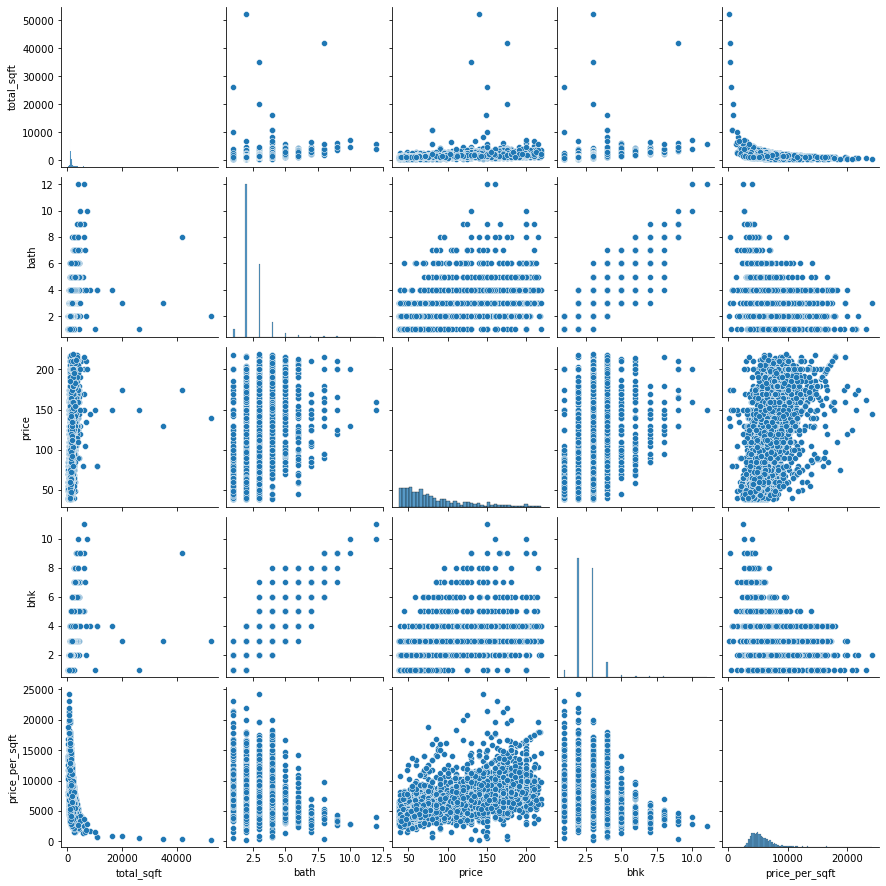

In [39]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

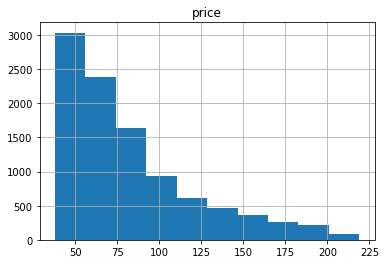

In [40]:
df.hist("price")

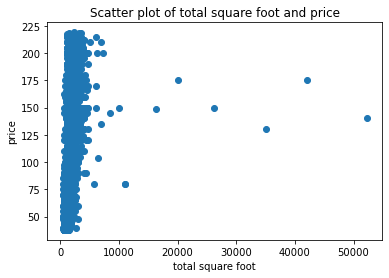

In [41]:
plt.scatter(x=df['total_sqft'], y=df['price'])
plt.xlabel('total square foot')
plt.ylabel('price')
plt.title('Scatter plot of total square foot and price')
plt.show()

<AxesSubplot:>

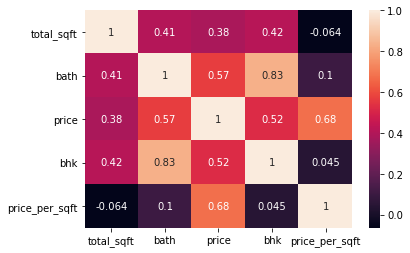

In [42]:
sns.heatmap(df.corr(), annot=True)
#higher the correlation coefficient, higher the dependency

# Regression models

## 1.Lasso

In [43]:
X = df[['total_sqft', 'bath','bhk', 'price_per_sqft']]
y = df.price

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [46]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 10.997159535885825
MSE: 297.70484469211266
RMSE: 17.254125439793018
R2 Square 0.7998883556544224
__________________________________
Train set evaluation:
_____________________________________
MAE: 11.486294508281818
MSE: 365.9201380519977
RMSE: 19.129039130390154
R2 Square 0.7712388175221047
__________________________________


### Grid search - Lasso

In [47]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [48]:
param = {
    'alpha':[0.001,0.01, 0.01,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'precompute':[True,False], 
    'warm_start':[True,False], 
    'positive':[True,False], 
    'selection':['random','cyclic']
}

In [49]:
#define model
model = Lasso()

# define search
search = GridSearchCV(model, param, cv=10)

# execute search
result = search.fit(X, y)

# summarize result
print('Best Hyperparameters: %s' % result.best_params_)

Best Hyperparameters: {'alpha': 0.001, 'fit_intercept': True, 'normalize': True, 'positive': False, 'precompute': True, 'selection': 'random', 'warm_start': False}


In [50]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.01, 
              fit_intercept = True,
              normalize = False,
              precompute=False, 
              warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 10.966822149964297
MSE: 300.67246330211725
RMSE: 17.33990955288168
R2 Square 0.7978935777714735
__________________________________
Train set evaluation:
_____________________________________
MAE: 11.454814238726671
MSE: 363.9713871055787
RMSE: 19.078034152018354
R2 Square 0.7724571122386267
__________________________________


## 2.Ridge

In [51]:
X = df[['total_sqft', 'bath','bhk', 'price_per_sqft']]
y = df.price

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 777)

In [53]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 11.071254578641271
MSE: 314.51852229506324
RMSE: 17.73467006445463
R2 Square 0.8013243003695079
__________________________________
Train set evaluation:
_____________________________________
MAE: 11.28017788317835
MSE: 354.6177438524919
RMSE: 18.831296924335614
R2 Square 0.7727546836274536
__________________________________


### Grid search - Ridge

In [54]:
param = {
    'alpha':[0.001,0.01, 0.01,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
       }

In [55]:
#define model
model = Ridge()

# define search
search = GridSearchCV(model, param, scoring='r2', n_jobs=-1, cv=10)

# execute search
result = search.fit(X, y)

# summarize result
print('Best Hyperparameters: %s' % result.best_params_)

Best Hyperparameters: {'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'solver': 'saga'}


In [56]:
model = Ridge(alpha=0.01,fit_intercept= True, normalize = True, solver ='saga')
model.fit(X_train,y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 11.139591095185683
MSE: 315.96703244326227
RMSE: 17.77546152546432
R2 Square 0.8004093025340375
__________________________________
Train set evaluation:
_____________________________________
MAE: 11.343770151404593
MSE: 354.7030503392167
RMSE: 18.833561807029938
R2 Square 0.7727000177233908
__________________________________


## 3.Linear regression

In [57]:
X = df[['total_sqft', 'bath','bhk', 'price_per_sqft']]
y = df.price

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [60]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [61]:
# print the intercept
print(lin_reg.intercept_)

82.46773484343773


In [62]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 11.09325059281306
MSE: 320.3575686529132
RMSE: 17.89853537731267
R2 Square 0.792935265569576
__________________________________
Train set evaluation:
_____________________________________
MAE: 11.189028322325049
MSE: 352.07962125009925
RMSE: 18.7637848327596
R2 Square 0.7761138325109429
__________________________________


### Grid Search - Linear Regression

In [63]:
param = {
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'positive':[True,False], 
    'copy_X':[True,False], 
       }

In [64]:
#define model
model = LinearRegression()

# define search
search = GridSearchCV(model, param, scoring='r2', n_jobs=-1, cv=10)

# execute search
result = search.fit(X, y)

# summarize result
print('Best Hyperparameters: %s' % result.best_params_)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True, 'positive': True}


In [65]:
model = LinearRegression(fit_intercept = True,
              copy_X = True,
              normalize = True,
              positive=True)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 11.093250592813057
MSE: 320.35756865291336
RMSE: 17.898535377312676
R2 Square 0.7929352655695759
__________________________________
Train set evaluation:
_____________________________________
MAE: 11.189028322325044
MSE: 352.07962125009925
RMSE: 18.7637848327596
R2 Square 0.7761138325109429
__________________________________


# Evaluation

In [66]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Lasso Regression,10.997160,297.704845,17.254125,0.799888,0.767002
1,Ridge Regression,11.071255,314.518522,17.734670,0.801324,0.769853
2,Linear Regression,11.093251,320.357569,17.898535,0.792935,0.769855


# Conclusion

Finally, I would like to conclude this project by saying that we have worked on real data for predicting house prices in Bangalore. First we prepared the data carefully, handled zero values, outliers and so on. Then we built 3 regression models - linear, ridge, lasso. We also applied a grid search and tuned the parameters. At the end of everything we compared these 3 models. That's all, thank you for your attention.